# Úkol č. 1 - vizualizace dat a web scraping (do 26. října)

  * V rámci tohoto úkolu musíte opanovat nástroje pro stahování dat z webu (tzv. _web scraping_) a následně data zpracovat a vizualizovat. 
  * Jak jsme ukázali na prvním cvičení (poslední část), data o závěrečných pracích na některých univerzitách skýtají zajímavé informace. 
  * Vaším úkolem je vybrat si jednu z univerzit ze seznamu níže, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace.
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Níže jsou odkazy na katalogy knihoven vybraných vysokých škol. Je třeba pochopit, jak z něho dostat informace o závěrečných pracích (bakalářky a diplomky) a ty pak nějak _vyparsovat_.

  * [Vysoká škola finanční a správní, a.s.](https://is.vsfs.cz/thesis/)
  * [Metropolitan university Prague](https://s-knihovna.mup.cz/katalog/eng/baze.htm)
  * [Vysoká škola regionálního rozvoje a Bankovní institut – AMBIS ](https://is.ambis.cz/thesis/)

Případně si můžete vybrat školu dle uvážení na portálu [theses.cz](https://theses.cz/th_search/tematicke), ale musí být splněno následující:
  * závěrečné práce musí být z jedné školy, alespoň z období 5 let, a musí jich být alespoň 2000,
  * u každé práce získáte alespoň následující: informaci o typu (bakalářka/diplomka), název, jméno vedoucího (vč. titulů), rok obhajoby, hodí se i jméno oponenta.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Stáhněte data z vybraného zdroje a uložte je do tabulky ve formátu _csv_.
  * Data musí obsahovat u každé práce (= 1 řádek tabulky) _alespoň_ toto:
    * informaci o typu (bakalářka/diplomka), název, jméno vedoucího (vč. titulů), rok obhajoby, hodí se i jméno oponenta
  * V druhé části Vašeho Jupyter notebooku pracujte s touto tabulkou načtenou z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulku ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu).
    * Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.). 
    * To samé pro oponenty a pro součet vedených a oponovaných prací.
    * Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího (resp. oponenta) a rok a další informace o rozložení vedení prací na školitele.
    * Rozložení vedoucích prací (a oponentů) podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) Zobrazte tabulku (a případně i jiné věci) v Jupyter notebooku pomocí http://beakerx.com.
  * (až +2 body) Vymyslete další zajímavé pohledy na data.
  * (až +4 body) Vytvořte na základě Vašich dat interaktivní webovou stránku s popisem a vizualizací dat (bude asi nutné použít i nějaké javascriptové balíčky atp.).
  * (až +4 body) Stáhněte data k více školám a porovnejte výsledky. Zkuste najít společné školitele/oponenty.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# [METROPOLITNÍ UNIVERZITA PRAHA](https://www.mup.cz)
## Sťahovanie dát a uloženie do tabuľky vo formáte .csv
 * Pre spracovávanie prác som si vybral túto univerzitnú stránku, pretože, mimo iného, dokáže zobrazovať [100 položiek](https://s-knihovna.mup.cz/katalog/l.dll?h%7E=&DD=56&TF=K&P1=19&V1=r&H1=2017&J1=.&L1=1&P2=2&V2=z&H2=&J2=.&L2=1&P3=3&V3=z&H3=&J3=.&L3=1&P4=4&V4=z&H4=&J4=.&L4=1&P5=+&V5=z&H5=&J5=.&VSE=on&TL=MR21) na jeden request. Tým som znížil celkový počet requestov a teda som menej čakal na server. Metódu POST som, bohužiaľ, nedokázal použiť, musel som parsovať celé html stránky.
 * Nepodarilo sa mi získať lepšie spracovateľné dáta, [formát MARC21]((https://s-knihovna.mup.cz/katalog/l.dll?cll~P=187443&TL=MR21) je asi najlepšie strojovo čitateľný (aspoň sa tak na začiatku tváril).
 * Rozhodol som sa zvýšiť počet dát, nech to vyzerá celé *zaujímavejšie*. Naťahal som všetky práce z rokov **2012-2017**, dostal som skoro **9000 záznamov**.
 * Dáta som stiahol najskôr ako `.html` súbory (~25MB), ktore som neskôr parsoval do `.csv` súborov pomocou `BeautifulSoup` a `Pandas`.


In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
from collections import OrderedDict

### Načítavanie a uloženie do .csv súborov.

In [2]:
def retrieve_page(url, year, page):
    dll = "l.dll?"
    parameters = {'h~' : '', 'DD' : '56', 'TF' : 'K', 
                  'P1' : '19', 'V1' : 'r', 'H1' : str(year),'J1' : '.', 'L1' : '1', 
                  'P2' : '2', 'V2' : 'z', 'H2' : '', 'J2' : '.', 'L2' : '1', 
                  'P3' : '3', 'V3' : 'z', 'H3' : '', 'J3' : '.', 'L3' : '1', 
                  'P4' : '4', 'V4' : 'z', 'H4' : '', 'J4' : '.', 'L4' : '1', 
                  'P5' : ' ', 'V5' : 'z', 'H5' : '', 'J5' : '.', 
                  'VSE' : 'on', 'TL' : 'MR21', 'Pg' : str(page)
    }
    print("fetching...")
    r = requests.get(url + dll, params=parameters)
    print("fetched from URL: " + r.url + "\n")
    return r.text

def get_marcs(content):
    bs = BeautifulSoup(content, features="html5lib")
    table = bs.find("table",{"class":"vse"}) 
    vse = table.findAll("font")
    marcs = list(f.get_text() for f in vse)
    return marcs

def parse_marc(marc):
    """
    Main function for parsing.
        Input str example:
        
        lab    -----nam  22----- i 4500
        008    171115s2017    xr |||||||||||||||||eng d
        100 1# $aBalochová, Žaneta,$c[absolvent],$g8853$4dis
        245 10 $aOptimalizace systému řízení bezpečnosti České republiky =$bOptimalization of the security 
        management system of the Czech Republic - NEOBHÁJENÁ PRÁCE /$cJan Žantovský ; vedoucí práce Pavel Štalmach
        264 #1 $aPraha,$c2017
        300 ## $a85 stran
        500 ## $aDatum obhajoby: 21.06.2017
        502 ## $aDiplomová práce (Mgr.) -- Metropolitní univerzita Praha, o.p.s., Katedra anglofonních studií, 2017
        655 #7 $adiplomové práce$7fd132022$2czenas
        700 1# $aKolinská, Klára,$d1967-$7mzk2005312854$4ths
        700 1# $aŽeníšek, Jakub$4opn
        710 2# $aMetropolitní univerzita Praha$7kn20080215020

    Returns dict
        all types of columns needed for later pd.DataFrame.

    """
    temp = {}
    leader = "";
    oponent = "";
    for s in marc.splitlines():
        code = s[:3]
        meat = re.split("[\$][a-z0-9]", s[7:])
        try:
            if(code == "008"):
                temp["id"] = s[7:13]
                temp["year"] = s[14:18]
                temp["lang"] = s[-5:-2]
            if(code == "100"):
                temp["author"] = re.split("[\$][a-z0-9]", s[5:])[1].replace(',' ,'')
            if(code == "245"):
                split = re.split("[\$][a-z0-9]", s[7:])
                pos_second = 2
                if("[rukopis]" in s):
                    pos_second = 3
                if(temp["lang"] == "eng"):
                    temp["name_eng"] = split[1][:-2]
                    temp["name_czk"] = split[pos_second][:-2]
                if(temp["lang"] == "cze" or temp["lang"] == "slo"):
                    temp["name_czk"] = split[1][:-2]
                    temp["name_eng"] = split[pos_second][:-2]
                if "NEOBHÁJENÁ PRÁCE" in s:
                    temp["unconvinced"] = 1
                if ("vedoucí práce" in s):
                    leader = re.search('vedoucí práce?(.*)', s).group(1).split(";")[0].strip()
                if ("oponent" in s):
                    res = re.search('oponent(.*)$', s)
                    oponent = res.group(1).strip()
                    
            if(code == "264"):
                if("place" not in temp):
                    temp["place"] = meat[1].replace(",", "")
                temp["year"] = meat[2]
            if(code == "300"):
                pages = re.match("[0-9]+", meat[1]).group(0)
                temp["pages"] = pages
            if(code == "502"):
                    spl = meat[1].split("--")
                    temp["thesis"] = spl[0].strip()
                    temp["school"] = spl[1].split(",")[0].strip()
                    faculty = spl[1].split(",")[2].strip()
                    if(not faculty.isdigit()):
                        temp["faculty"] = faculty
            if(code == "700"):
                if(meat[len(meat)-1]=="opn"):
#                     if("oponent" not in temp):
                    temp["oponent"] = meat[1].replace(",", "")
                if(meat[len(meat)-1]=="ths"):
#                     if("leader" not in temp):
                    temp["leader"] = meat[1].replace(",", "")
                    
            if(code == "260"):
                if("place" not in temp):
                    temp["place"] = meat[1].replace(":", "").strip()
        except Exception as e:
            print("ERROR in line: " + s)
            print(e)
            raise(e)
            
    if ("oponent" not in temp and oponent != ''):
        temp["oponent"] = reverse_words(oponent)
            
    if ("leader" not in temp and leader != ''):
        temp["leader"] = reverse_words(leader)
    return temp

def reverse_words(input): 
    inputWords = input.split(" ") 
    inputWords=inputWords[-1::-1] 
    output = " ".join(inputWords) 
    return output 

def retrieve_csv(year, pages, fetch=False):
    """
    set fetch=True, if you need to download the html.
    
    writes .csv file with name: 'mupcz<year>.csv' of given year.
    """
    url = 'https://s-knihovna.mup.cz/katalog/'
    dfs = list()
    for page in range(1, pages + 1):
        
        if(fetch==True):
            page_html = retrieve_page(url, year, page)
            
            with open("html-pages/" + str(year) + str(page) + ".html", 'w') as file:
                file.write(page_html)
        else:
            with open("html-pages/" + str(year) + str(page) + ".html", 'r') as file:
                page_html = file.read()
                
        marcs = get_marcs(page_html)
        data = list()
        print("processing: " + str(len(marcs)) + " records...")
        for d in marcs:
            try:
                parsed = parse_marc(d)
                if(parsed != {}):
                    data.append(parsed)
            except Exception as e:
                print(e)
        print("processed: " + str(len(data)) + " records.")
        df = pd.DataFrame(data)
        dfs.append(df)
    all = pd.concat(dfs, sort=False)
    all.to_csv("mupcz" + str(year) + ".csv")

npages = 20
    

### Drobné testy
* Potreboval som otestovať používané metódy, dáta neboli vždy v konzistentnom stave (autor sa niekedy volal '\[rukopis\]', vedúci práce zas 'NEOBHÁJENÁ PRÁCE' atď.)


In [3]:
# # tests 

# with open('tests.txt','r') as f:
#     test = f.read()
#     print(test)
#     print(parse_marc(test))
    
# with open("html-pages/" + str(2012) + str(1) + ".html", 'r') as file:
#     page_html = file.read()
# marcs = get_marcs(page_html)
# data = list()
# print("processing: " + str(len(marcs)) + " records...")
# for d in marcs:
#     try:
#         print(d)
#         parsed = parse_marc(d)
#         if(parsed != {}):
#             print(parsed)
#             print()
#             data.append(parsed)
#     except Exception as e:
#         print(e)
# print("processed: " + str(len(data)) + " records.")

# parse_marc(get_marcs(retrieve_page(url='https://s-knihovna.mup.cz/katalog/', year=2017, page=12))[0])

### Spúšťať len v prípade sťahovania/parsovania dát
* Mohlo by to trvať dlho. Ak sa do funkcie `retrieve_csv()` pripíše `fetch=True`, začne sťahovať dáta priamo z knižnice.
* Inak to len parsuje dáta z html stránok (mali by byť stiahnuté predom). Trvá to cca ~35sec.

In [4]:
# Start only when you need to fetch/parse data. 
# This could take longer than you would like to (parsing: ~35sec, fetching: way too long.).

# import time
# start = time.time()
# for year in range(2012, 2018):
#     retrieve_csv(year, npages)
# end = time.time()
# print("evaluation time: " + str(end-start) + " seconds")

### Vsetky .csv subory su prilozene v commite. 
- Staci ich len poslat do dataframe. Neskor pripadne zobrazit zakladne info.

In [5]:
csvs = list()
for year in range(2012, 2018):
    csvs.append(pd.read_csv("mupcz" + str(year) + ".csv"))
df = pd.concat(csvs, ignore_index=True, sort=False)

In [6]:
# display(df.head())
display(df.info())
# display(df.describe())
display(df.isnull().sum())
# display(df.notnull().sum())
display(df.nunique())
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 15 columns):
Unnamed: 0     8968 non-null int64
author         8968 non-null object
faculty        8950 non-null object
id             8968 non-null int64
lang           8968 non-null object
leader         8964 non-null object
name_czk       8968 non-null object
name_eng       8968 non-null object
oponent        8920 non-null object
pages          8965 non-null float64
place          8968 non-null object
school         8967 non-null object
thesis         8967 non-null object
unconvinced    296 non-null float64
year           8968 non-null int64
dtypes: float64(2), int64(3), object(10)
memory usage: 1.0+ MB


None

Unnamed: 0        0
author            0
faculty          18
id                0
lang              0
leader            4
name_czk          0
name_eng          0
oponent          48
pages             3
place             0
school            1
thesis            1
unconvinced    8672
year              0
dtype: int64

Unnamed: 0      100
author         7356
faculty          13
id              389
lang              3
leader          426
name_czk       7928
name_eng       8249
oponent         627
pages           170
place             9
school            1
thesis            8
unconvinced       1
year              6
dtype: int64

### Čistenie dát
* niekedy sa vyskytnú drobné nedostatky v dátach.

In [7]:
dc = df.copy()
dc.drop(columns=["Unnamed: 0"], inplace=True)
dc["convinced"] = dc["unconvinced"].isnull()
dc.drop(columns=["unconvinced"], inplace=True)
dc.drop(columns=["school"], inplace=True)

df = dc.copy()

In [8]:
dc = df.copy()

string_cols = ["thesis", "faculty", "lang", "place", "year"]
for col in string_cols:
    dc[col] = dc[col].astype('category')
    
display(dc.nunique())
df = dc.copy()
df.info()

author       7356
faculty        13
id            389
lang            3
leader        426
name_czk     7928
name_eng     8249
oponent       627
pages         170
place           9
thesis          8
year            6
convinced       2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
author       8968 non-null object
faculty      8950 non-null category
id           8968 non-null int64
lang         8968 non-null category
leader       8964 non-null object
name_czk     8968 non-null object
name_eng     8968 non-null object
oponent      8920 non-null object
pages        8965 non-null float64
place        8968 non-null category
thesis       8967 non-null category
year         8968 non-null category
convinced    8968 non-null bool
dtypes: bool(1), category(5), float64(1), int64(1), object(5)
memory usage: 544.9+ KB


### Natiahnutie titulov do separátnej tabuľky
* Tituly u vedúcich a oponentov neboli priamo v dátach z knižnice. 
* Sťahujem ich teda priamo zo [stránky MUP](https://www.mup.cz/o-univerzite/katedry/), podobný princíp ako pri sťahovaní záverečných prác. `.csv` priložené.

In [9]:
def retrieve_academics_html(url, fetch=False):
    name = url.split("/")[-2]
    name = "html-pages/" + name + ".html"
    if(fetch==True):
        page_html = requests.get(url).text
        with open(name, 'w') as file:
            file.write(page_html)
        print("file: " + name + ", written.")
    else:
        with open(name, 'r') as file:
            page_html = file.read()
            print("file: " + name + " was read.")
    return page_html
            
    
def get_dotted(html):
    bs = BeautifulSoup(html)
    faculty = bs.find(name="h1").text
    temps = []
    table = bs.find("div", {"class": "uckatedra2"})
    spans = table.findAll("span", attrs={"vc-inner"})
    for s in spans:
        temp = {}
        temp["faculty"] = faculty
        gen = list(s.children)
        
        pair = get_titles(gen[0])
        temp["name"] = pair[0]
#         print(pair[0])
        temp["titles"] = pair[1]
#         print(pair[1])
        for title in pair[1]:
            temp[title] = 1
#         temp[]
        try:
            temp["special"] = gen[2].replace("-", "").strip()
        except Exception as e:
            pass
        temps.append(temp)
        
    externals = get_externals(bs.find("ul", {"class": "ucext"}), faculty)
    for t in externals:
        temps.append(t)
    
    return temps

def get_externals(lis, faculty):
    if lis is None:
        return []
    
    lis = lis.find_all("li")
    
    temps = []
    for l in lis:
        raw = l.text
        temp = {}
        temp["faculty"] = faculty
        
        pair = get_titles(raw)
        temp["name"] = pair[0]
#         print(pair[0])
        temp["titles"] = pair[1]
        temp["special"] = "externista"
#         print(pair[1])
#         for title in pair[1]:
#             temp[title] = True
        temps.append(temp)
    return temps

def get_titles(full):
    titles = []
    name = ""
    first = full.split(",")[0]
    second = full.split(",")[1:]
    
    for s in first.split(" "):
        if "." in s:
            titles.append(s.strip())
        if ("." not in s and "^et$" not in s):
            name += s + " "
    name = reverse_words(name).strip()
    
    for spl in second:
        spl = spl.replace(",", "").strip()
        if(spl != ""):
            titles.append(spl.strip())
    return name, titles

In [10]:
# # tests again

# display(get_titles("Markéta Zezulková"))
# display(get_titles("Mgr. Miroslava Škaloudová"))
# display(get_titles("Mgr. Markéta Zezulková, Ph.D., MA, PGCE"))
# display(get_titles("doc. PhDr. RNDr. Nikola Hynek, M.A., PgDip Res, Ph.D"))
# display(get_titles("doc. Ing. Tomáš Frýza, Ph.D."))
# display(get_titles("PhDr. et Mgr. Ivana Spurná, Ph.D."))
# display(get_titles("doc. PhDr., PaedDr. Hana Horáková, Ph.D."))
# display(get_titles("PhDr. Petra Andělová, Ph.D."))

# get_dotted(retrieve_academics_html("https://www.mup.cz/o-univerzite/katedry/katedra-pravnich-disciplin-a-verejne-spravy/"))

#### Spustiť v prípade potreby sťahovania a parsovania titulov priamo zo stránky
* Ak chcete sťahovať a parsovať zo stránky katedier, stačí len nastaviť vo funkcii `fetch=True`
* Ak to už raz pustíte, nstaviť na `False`, html súbory by mali byť natiahnuté. Čítam teda odtiaľ.
* Každopádne nič z tohoto nepotrebujete (jedine ak by ste veľmi chceli overiť správnosť kódu), všetko je v `academics.csv`
* Nerátam externistov.

In [11]:
def retrieve_academics_csv(fetch=False):
    url = "https://www.mup.cz/"
    r = requests.get(url + "o-univerzite/katedry/")
    bs = BeautifulSoup(r.text, features="html5lib")
    div = bs.find(name="div", attrs={"border-box"})
    urls = []
    
    for a in div.findAll("a", href=True):
        urls.append(url + a["href"])

    print("fetching and parsing...")
    acs = pd.DataFrame()
    for u in urls:
        html = retrieve_academics_html(u, fetch)
        ac = pd.DataFrame(get_dotted(html))
        acs = pd.concat([ac, acs], ignore_index=True)
    print("fetching and parsing done!")
    acs.to_csv("academics.csv")
    
#     uncomment this, when csv needed
# retrieve_academics_csv(fetch=True)

In [12]:
acad = pd.DataFrame(pd.read_csv("academics.csv"))
acad.drop(columns=["Unnamed: 0"], inplace=True)
display(acad.name.isnull().sum())
display(acad.name.nunique())
display(acad.info())
dropped = acad.name.drop_duplicates()
dropped.duplicated().count()

1

223

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 30 columns):
B.A.                       4 non-null float64
BA                         1 non-null float64
CSc.                       14 non-null float64
CSc. Dr. hab.              1 non-null float64
DELTA                      2 non-null float64
DSc.                       1 non-null float64
Dr.                        1 non-null float64
Ing.                       26 non-null float64
JUDr.                      18 non-null float64
LL.M.                      1 non-null float64
M.A.                       6 non-null float64
M.Phil.                    1 non-null float64
M.Sc. et M.Sc.             1 non-null float64
MBA                        4 non-null float64
MSc.                       1 non-null float64
MUDr.                      1 non-null float64
Mgr.                       44 non-null float64
PaedDr.                    3 non-null float64
PaedDr. Hana Horáková      1 non-null float64
Ph.D.            

None

224

## Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu).

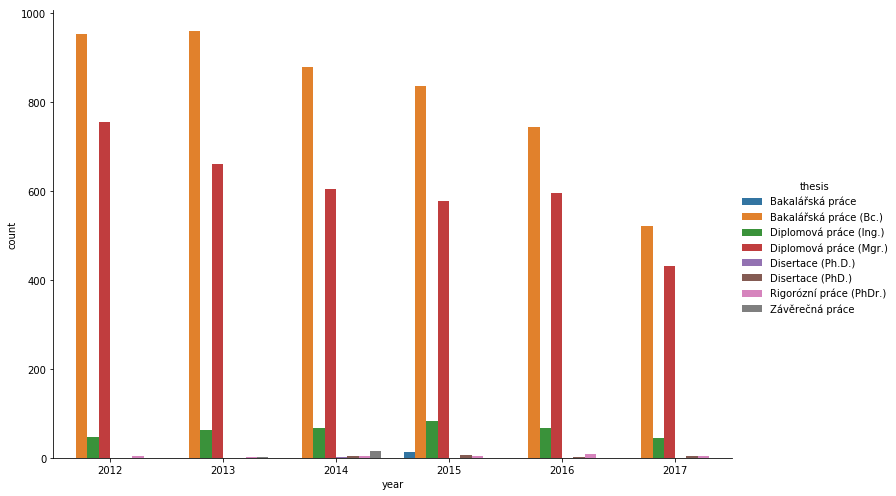

In [13]:

gr = df.groupby(["year","thesis"]).size()
gr = gr.reset_index(name="count")
gr
sns.catplot(data=gr, x="year", y="count", hue="thesis", kind="bar", legend_out=True, aspect=1.5, height=7)

## Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.).

'Abrhám Josef: as best leader, leading: 260 thesis.'

name                     titles  \
20  Abrhám Josef  ['doc.', 'Ing.', 'Ph.D.']   

                                        faculty  
20  Katedra právních disciplín a veřejné správy

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


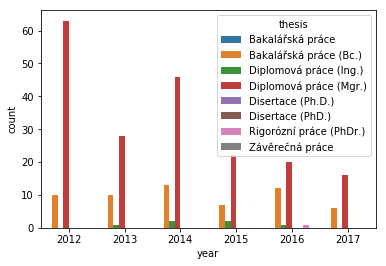

In [14]:
group = df.groupby(["leader"]).size()
bestL = group.idxmax()

best_acad = acad[acad.name == bestL]
display(bestL + ": as best leader, leading: " + str(group.values.max()) + " thesis.")
display(best_acad[["name", "titles", "faculty"]])


best_leader = df[df.leader == bestL]

# best_leader.year.astype("category")
best_leader.thesis = best_leader.thesis.astype("category")

sns.countplot(data=best_leader, x=best_leader.year, hue=best_leader.thesis)

## To samé pro oponenty a pro součet vedených a oponovaných prací.

'Fireš Adam: as best oponent, oponing: 427 thesis.'

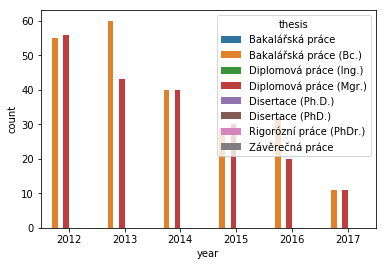

In [15]:
group = df.groupby(["oponent"]).size()
bestO = group.idxmax()
display(bestO + ": as best oponent, oponing: " + str(group.values.max()) + " thesis.")

# napriek vsetkej snahe, najlepsi oponent ostava utajeny...
best_oponent = df[df.oponent == bestO]

best_oponent = df[df.oponent == bestO]

sns.countplot(data=best_oponent, x=best_oponent.year, hue=best_oponent.thesis)

In [16]:
leaders = df.groupby(["leader"], sort=True).size()
oponents = df.groupby(["oponent"], sort=True).size()

l = pd.DataFrame(columns=["name", "leading"])
l.name = leaders.keys()
l.leading = leaders.values
l.sort_values("leading",ascending=False)

o = pd.DataFrame(columns=["name", "oponing"])
o.name = oponents.keys()
o.oponing = oponents.values

r = l.set_index("name").join(o.set_index("name"))
r["sum"] = r["leading"] + r["oponing"]
r.fillna(0)
r.sort_values("sum", ascending=False).head(10)

leading  oponing    sum
name                                       
Fireš Adam              234    427.0  661.0
Abrhám Josef            260    311.0  571.0
Horváthová Zuzana       160    175.0  335.0
Anděl Petr              142    181.0  323.0
Novotný Lukáš           163    155.0  318.0
Rouč Vít                106    120.0  226.0
Makariusová Radana      181     36.0  217.0
Bauerová Helena         120     95.0  215.0
Křepelka Jiří           100     98.0  198.0
Cabada Ladislav         101     96.0  197.0

## Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího (resp. oponenta) na rok a další informace o rozložení vedení prací na školitele.

In [17]:
# overall
print("Overall stats")
display("MEDIAN", r.median())
display("MEAN", r.mean())
data = r.copy()
data.sort_values(["leading", "oponing"], ascending=False, inplace=True)
# sns.regplot(x=data.leading, y=data.oponing, ci=100, marker='+')


Overall stats


'MEDIAN'

leading     7.0
oponing    10.5
sum        27.0
dtype: float64

'MEAN'

leading    21.042254
oponing    20.490323
sum        48.329032
dtype: float64

In [18]:
dfgL = df.groupby(
        by=["year", "leader"]
    ).size().reset_index(name="per_leader")
dfgL.year = dfgL.year.astype("category")
dfgL.head()

year           leader  per_leader
0  2012     Abrhám Josef          73
1  2012   Adamcová Lenka           3
2  2012       Anděl Petr          40
3  2012   Andělová Petra          16
4  2012  Bahýl'ová Lenka           1

In [19]:
dfgO = df.groupby(
        by=["year", "oponent"]
    ).size().reset_index(name="per_oponent")
dfgO.year = dfgO.year.astype("category")
dfgO.head()

year            oponent  per_oponent
0  2012       Abrhám Josef           59
1  2012     Adamcová Lenka           10
2  2012         Anděl Petr           43
3  2012     Andělová Petra            6
4  2012  Babický Stanislav            1

In [20]:
dfi = dfgL.copy()
# dfi = dfg.set_index([dfg.year, dfg.leader])
# dfi.drop(columns=["year", "leader"], inplace=True)
dfi = dfi.groupby("year").mean()
dfi.rename(columns={"per_leader":"mean_per_year"})

mean_per_year
year               
2012       6.552239
2013       7.497778
2014       7.473934
2015       7.455882
2016       7.309278
2017       6.203704

In [21]:
dfi = dfgO.copy()
# dfi = dfg.set_index([dfg.year, dfg.leader])
# dfi.drop(columns=["year", "leader"], inplace=True)
dfi = dfi.groupby("year").mean()
dfi.rename(columns={"per_oponent":"mean_per_year"})

mean_per_year
year               
2012       4.584656
2013       5.213622
2014       4.980831
2015       4.828571
2016       4.889655
2017       4.118852

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


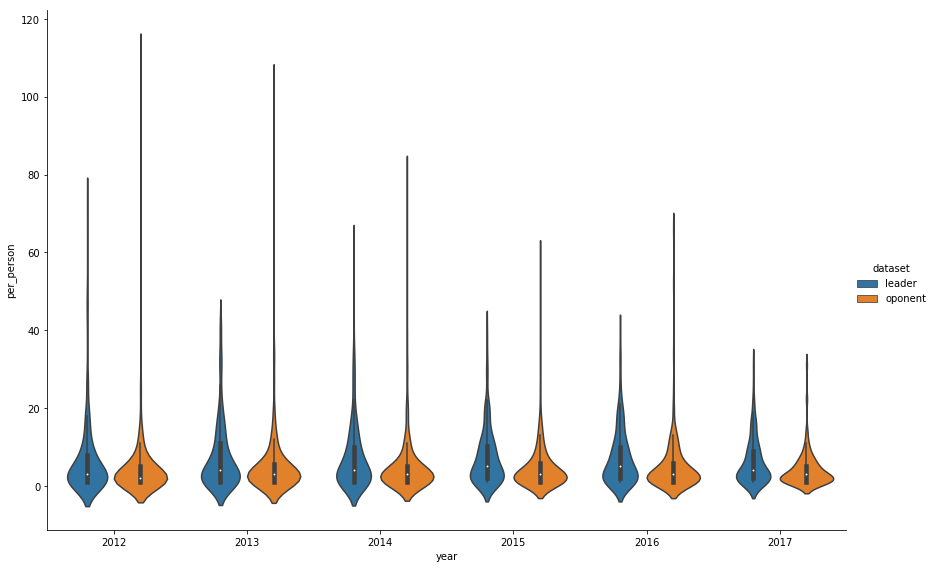

In [22]:
df1 = dfgL.rename(columns={"per_leader":"per_person"})
df2 = dfgO.rename(columns={"per_oponent":"per_person"})



concatenated = pd.concat([df1.assign(dataset='leader'), df2.assign(dataset='oponent')], 
                         sort=False, ignore_index=True)



sns.catplot(x='year', y='per_person', data=concatenated, hue="dataset", 
            kind="violin", legend_out=True, aspect=1.5, height=8)
# lo = pd.concat([dfgL, dfgO], ignore_index=True)
# sns.catplot(data=lo, )

## Rozložení vedoucích prací (a oponentů) podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).
* Informácie o akademických pracovníkoch celkovo

In [24]:
# https://gist.github.com/jlln/338b4b0b55bd6984f883

def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].replace("[", "").replace("]", "").replace("'", "").split(separator)
#         split_row = row[target_column]
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s.strip()
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [25]:
print("Nr. of externals:", len(acad[acad.special == "externista"].index))
# display(acad.head(5))

# gr = acad.groupby(["faculty","name"]).size().reset_index(name="nr")
# a = acad.copy()
# # a = acad.agg(func="sum")
# a = acad.replace(np.nan, 0)
# a = a.groupby(["faculty"])
# display(a.agg("sum"))
# display(type(acad.titles[0]))

a = acad.copy()
a = a[["titles", "faculty"]]


a = splitDataFrameList(a, "titles", ",")

a = a.groupby(["faculty", "titles"]).size().reset_index(name="count")
a
# a = a.dropna()
# a.isna().count()



Nr. of externals: 100


faculty          titles  count
0    Katedra International Relations and European S...            Ing.      2
1    Katedra International Relations and European S...            Mgr.      3
2    Katedra International Relations and European S...           Ph.D.      8
3    Katedra International Relations and European S...            doc.      1
4                          Katedra anglofonních studií            B.A.      1
5                          Katedra anglofonních studií              BA      1
6                          Katedra anglofonních studií             Bc.      1
7                          Katedra anglofonních studií            CSc.      3
8                          Katedra anglofonních studií           DELTA      1
9                          Katedra anglofonních studií            M.A.      3
10                         Katedra anglofonních studií            Mgr.      8
11                         Katedra anglofonních studií           Ph.D.     10
12                         Katedra anglofonních studií           PhDr.      9
13                         Katedra anglofonních studií            doc.      3
14                         Katedra anglofonních studií           prof.      3
15                            Katedra asijských studií            Ing.      3
16                            Katedra asijských studií            M.A.      1
17                            Katedra asijských studií  M.Sc. et M.Sc.      1
18                            Katedra asijských studií            Mgr.      5
19                            Katedra asijských studií           Ph.D.     12
20                            Katedra asijských studií           PhDr.      5
21                            Katedra asijských studií            doc.      4
22                       Katedra bezpečnostních studií             Dr.      1
23                       Katedra bezpečnostních studií            Ing.      5
24                       Katedra bezpečnostních studií         M.Phil.      1
25                       Katedra bezpečnostních studií            Mgr.      2
26                       Katedra bezpečnostních studií           Ph.D.      7
27                       Katedra bezpečnostních studií           PhDr.      2
28                       Katedra bezpečnostních studií           RNDr.      1
29                       Katedra bezpečnostních studií            doc.      4
..                                                 ...             ...    ...
85            Katedra politologie a humanitních studií            M.A.      1
86            Katedra politologie a humanitních studií            Mgr.      6
87            Katedra politologie a humanitních studií           Ph.D.     10
88            Katedra politologie a humanitních studií           PhDr.      7
89            Katedra politologie a humanitních studií           RNDr.      1
90            Katedra politologie a humanitních studií            doc.      3
91            Katedra politologie a humanitních studií           prof.      2
92         Katedra právních disciplín a veřejné správy            CSc.      4
93         Katedra právních disciplín a veřejné správy   CSc. Dr. hab.      1
94         Katedra právních disciplín a veřejné správy            Ing.      5
95         Katedra právních disciplín a veřejné správy           JUDr.     19
96         Katedra právních disciplín a veřejné správy            Mgr.      7
97         Katedra právních disciplín a veřejné správy         PaedDr.      1
98         Katedra právních disciplín a veřejné správy           Ph.D.     14
99         Katedra právních disciplín a veřejné správy           PhDr.      4
100        Katedra právních disciplín a veřejné správy            doc.      4
101        Katedra právních disciplín a veřejné správy           prof.      2
102                   Katedra průmyslového vlastnictví            CSc.      3
103                   Katedra průmyslového vlastnictví             DBA      1
104                   Katedra průmyslového vlastnictví           DrSc

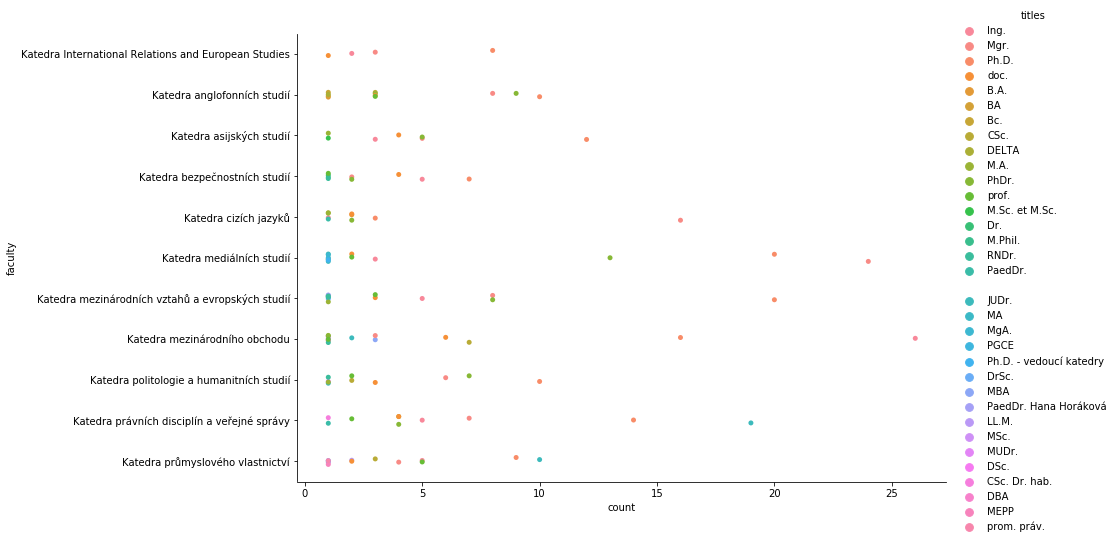

In [26]:
sns.catplot(data=a, y="faculty", x="count", hue="titles", aspect=2, height=7)

In [28]:
# nieco ako heatmap, nepodarilo sa mi to napasovat.. bohuzial.
a = acad.copy()
a = acad.replace(np.nan, 0)
a = a.groupby(["faculty"])
display(a.agg("sum"))
display(type(acad.titles[0]))

B.A.   BA  CSc.  \
faculty                                                               
Katedra International Relations and European St...   0.0  0.0   0.0   
Katedra anglofonních studií                          1.0  1.0   2.0   
Katedra asijských studií                             0.0  0.0   0.0   
Katedra bezpečnostních studií                        0.0  0.0   0.0   
Katedra cizích jazyků                                2.0  0.0   0.0   
Katedra mediálních studií                            0.0  0.0   1.0   
Katedra mezinárodních vztahů a evropských studií     0.0  0.0   0.0   
Katedra mezinárodního obchodu                        1.0  0.0   4.0   
Katedra politologie a humanitních studií             0.0  0.0   1.0   
Katedra právních disciplín a veřejné správy          0.0  0.0   3.0   
Katedra průmyslového vlastnictví                     0.0  0.0   3.0   

                                                    CSc. Dr. hab.  DELTA  \
faculty                                                                    
Katedra International Relations and European St...            0.0    0.0   
Katedra anglofonních studií                                   0.0    1.0   
Katedra asijských studií                                      0.0    0.0   
Katedra bezpečnostních studií                                 0.0    0.0   
Katedra cizích jazyků                                         0.0    1.0   
Katedra mediálních studií                                     0.0    0.0   
Katedra mezinárodních vztahů a evropských studií              0.0    0.0   
Katedra mezinárodního obchodu                                 0.0    0.0   
Katedra politologie a humanitních studií                      0.0    0.0   
Katedra právních disciplín a veřejné správy                   1.0    0.0   
Katedra průmyslového vlastnictví                              0.0    0.0   

                                                    DSc.  Dr.  Ing.  JUDr.  \
faculty                                                                      
Katedra International Relations and European St...   0.0  0.0   2.0    0.0   
Katedra anglofonních studií                          0.0  0.0   0.0    0.0   
Katedra asijských studií                             0.0  0.0   0.0    0.0   
Katedra bezpečnostních studií                        0.0  1.0   5.0    0.0   
Katedra cizích jazyků                                0.0  0.0   1.0    0.0   
Katedra mediálních studií                            0.0  0.0   0.0    0.0   
Katedra mezinárodních vztahů a evropských studií     0.0  0.0   1.0    0.0   
Katedra mezinárodního obchodu                        0.0  0.0  14.0    0.0   
Katedra politologie a humanitních studií             1.0  0.0   0.0    0.0   
Katedra právních disciplín a veřejné správy          0.0  0.0   1.0   13.0   
Katedra průmyslového vlastnictví                     0.0  0.0   2.0    5.0   

                                                    LL.M.     ...       Mgr.  \
faculty                                                       ...              
Katedra International Relations and European St...    0.0     ...        3.0   
Katedra anglofonních studií                           0.0     ...        7.0   
Katedra asijských studií                              0.0     ...        2.0   
Katedra bezpečnostních studií                         0.0     ...        2.0   
Katedra cizích jazyků                                 0.0     ...       14.0   
Katedra mediálních studií                             0.0     ...        8.0   
Katedra mezinárodních vztahů a evropských studií      0.0     ...        5.0   
Katedra mezinárodního obchodu                         0.0     ...        0.0   
Katedra politologie a humanitních studií              0.0     ...        1.0   
Katedra právních disciplín a veřejné správy           0.0     ...        1.0   
Katedra průmyslového vlastnictví                      1.0     ...        1.0   

                                                    PaedDr.  \
faculty             

str

In [34]:
# Nepodarilo sa obhajit pracu tymto chudakom:
undefended = df[df.convinced == False]
display("number of undefended:", undefended.author.count())
display(undefended)


'number of undefended:'

296

author  \
66                   Pittr Pavel   
132                Škarda Václav   
135           Bublikov Vjačeslav   
189               Kuchynka Miron   
190               Kuchynka Miron   
218   Koubová Jaroslava Dominika   
224         Herbrecherová Jindra   
225             Pacovská Markéta   
277             Šobrová Michaela   
322               Fencl Ladislav   
348                 Tříska Pavel   
424          Šnajberková Barbora   
437              Pelantová Ljuba   
460             Slezáková Tereza   
480               Čelovský Jakub   
514           Špererová Michaela   
543                    Šustr Jan   
549                Šabouk Štěpán   
569         Petržíková Jaroslava   
585          Marchenko Anastasia   
657                  Bouška Petr   
677             Havránek Richard   
680                 Zachař Luděk   
755         Úradníčková Veronika   
761                Dietze Albert   
810                Houdek Robert   
820              Škvárová Jolana   
823                  Gálová Dana   
829               Veklich Ruslan   
873               Žáček Jaroslav   
...                          ...   
6892         Yadryshnikova Diana   
6917           Sklenářová Nikola   
6944             Bostl František   
6960             Habartová Adéla   
6973                Bačík Július   
6985               Svoboda Radek   
6991             Mezníková Petra   
7030           Byrtusová Daniela   
7047          Zavadilová Daniela   
7178             Krasnova Darina   
7195               Čamov Raymond   
7204         Jeřábková Miroslava   
7295                 Tuma Václav   
7334          Špitálský Jaroslav   
7354               Fuksová Marta   
7358                Hojer Martin   
7381            Shtjefni Ortensa   
7518             Kaydashov Maxim   
7553                 Salaba Petr   
7558               Dunka Lubomír   
7598              Sitdikov Dinar   
7648          Nedorostová Milena   
7651         Tománková Alexandra   
7667                 Drtil Marek   
7684           Perepelkina Alisa   
7789            Lukyová Nathalie   
7878            Kovalaková Lucie   
7913          Červenková Vendula   
8465            Šídlová Michaela   
8642               Hercjuk Tomáš   

                                                faculty      id lang  \
66          Katedra právních disciplín a veřejné správy  130516  cze   
132    Katedra mezinárodních vztahů a evropských studií  170504  cze   
135    Katedra mezinárodních vztahů a evropských studií  130309  cze   
189    Katedra mezinárodních vztahů a evropských studií  140228  cze   
190    Katedra mezinárodních vztahů a evropských studií  170505  cze   
218         Katedra právních disciplín a veřejné správy  141212  cze   
224         Katedra právních disciplín a veřejné správy  141212  cze   
225         Katedra právních disciplín a veřejné správy  150112  cze   
277    Katedra mezinárodních vztahů a evropských studií  170510  cze   
322    Katedra mezinárodních vztahů a evropských studií  140617  cze   
348    Katedra mezinárodních vztahů a evropských studií  150317  cze   
424    Katedra mezinárodních vztahů a evropských studií  140613  cze   
437         Katedra právních disciplín a veřejné správy  141212  cze   
460    Katedra mezinárodních vztahů a evropských studií  130514  cze   
480         Katedra právních disciplín a veřejné správy  141212  cze   
514    Katedra mezinárodních vztahů a evropských studií  140602  cze   
543         Katedra právních disciplín a veřejné správy  131029  cze   
549            Katedra politologie a humanitních studií  140618  cze   
569    Katedra mezinárodních vztahů a evropských studií  140808  cze   
585    Katedra mezinárodních vztahů a evropských studií  170504  cze   
657    Katedra mezinárodních vztahů a evropských studií  130309  cze   
677    Katedra mezinárodních vztahů a evropských studií  131021  cze   
680    Katedra mezinárodních vztahů a evropských studií  140617  cze   
755    Katedra mezinárodních vztahů a evropských studií  170510  